   Tweet_ID        Username  \
0         1         julie81   
1         2   richardhester   
2         3  williamsjoseph   
3         4     danielsmary   
4         5      carlwarren   

                                                Text  Retweets  Likes  \
0  Party least receive say or single. Prevent pre...         2     25   
1  Hotel still Congress may member staff. Media d...        35     29   
2  Nice be her debate industry that year. Film wh...        51     25   
3  Laugh explain situation career occur serious. ...        37     18   
4  Involve sense former often approach government...        27     80   

          Timestamp  
0  30/01/2023 11:00  
1  02/01/2023 22:45  
2  18/01/2023 11:25  
3  10/04/2023 22:06  
4  24/01/2023 07:12  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 
 1   Username   10

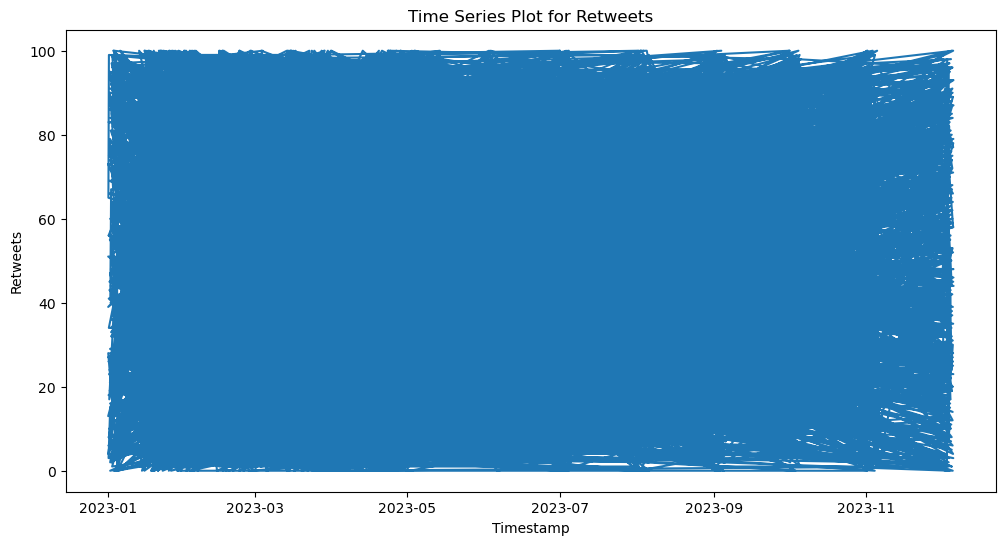

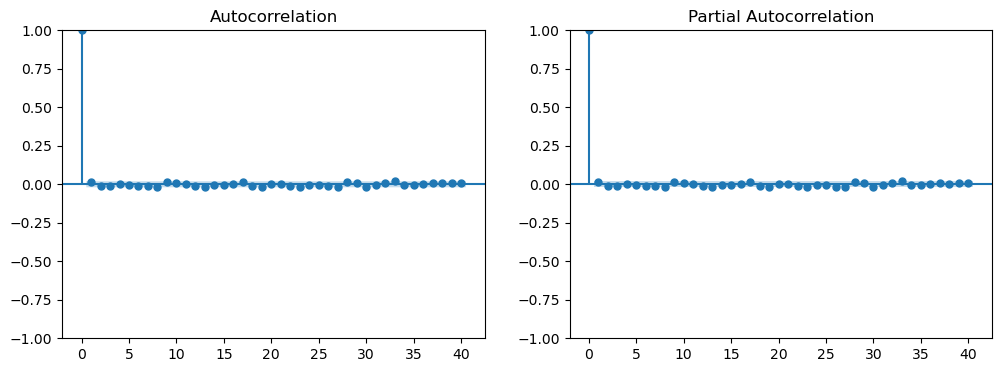

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  # Import the warnings module
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 2: Load Twitter Dataset
file_path = 'twitter_dataset.csv'
twitter_data = pd.read_csv(file_path)

# Step 3: Explore the Data
print(twitter_data.head())
print(twitter_data.info())
# Check for and handle missing values if needed

# Step 4: Time Series Analysis
# Convert 'Timestamp' to datetime and set it as the index
twitter_data['Timestamp'] = pd.to_datetime(twitter_data['Timestamp'])
twitter_data.set_index('Timestamp', inplace=True)

# Augmented Dickey-Fuller Test
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

# Assuming 'Retweets' as the time series column
adf_test(twitter_data['Retweets'])

# Step 5: Visualizations
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(twitter_data['Retweets'])
plt.title('Time Series Plot for Retweets')
plt.xlabel('Timestamp')
plt.ylabel('Retweets')
plt.show()

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Autocorrelation and Partial Autocorrelation Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(twitter_data['Retweets'], ax=ax1)
plot_pacf(twitter_data['Retweets'], ax=ax2)
plt.show()

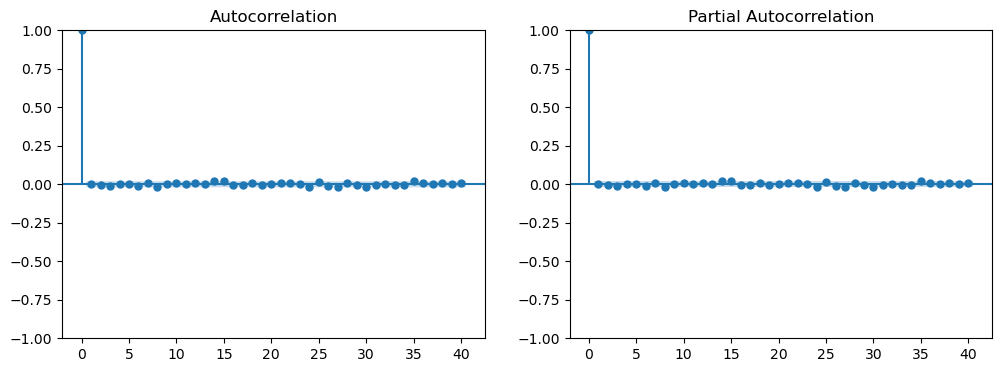

Ljung-Box Test Statistic: l, p-value: l
ARCH Test Statistic: 1.7762508844639058, p-value: 0.8791568683028913
Shapiro-Wilk Test Statistic: 0.9561458230018616, p-value: 0.0


In [2]:
# Import Libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import het_arch
from scipy.stats import shapiro

# Suppress specific warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# Load Twitter Dataset
file_path = 'twitter_dataset.csv'
twitter_data = pd.read_csv(file_path)

# Convert 'Timestamp' to datetime and set it as the index
twitter_data['Timestamp'] = pd.to_datetime(twitter_data['Timestamp'], dayfirst=True)
twitter_data = twitter_data.sort_values('Timestamp')  # Sort the data by timestamp
twitter_data.set_index('Timestamp', inplace=True)

# Assuming 'Retweets' as the time series column
time_series = twitter_data['Retweets']

# Function to check model adequacy
def check_model_adequacy(residuals):
    # Ljung-Box test for autocorrelation of residuals
    lb_test_stat, p_value = acorr_ljungbox(residuals, lags=[10])
    print(f'Ljung-Box Test Statistic: {lb_test_stat[0]}, p-value: {p_value[0]}')
    
    # Check for heteroscedasticity (ARCH test)
    arch_test_stat, p_value_arch, _, _ = het_arch(residuals, nlags=5)
    print(f'ARCH Test Statistic: {arch_test_stat}, p-value: {p_value_arch}')
    
    # Shapiro-Wilk test for normality of residuals
    shapiro_test_stat, shapiro_p_value = shapiro(residuals)
    print(f'Shapiro-Wilk Test Statistic: {shapiro_test_stat}, p-value: {shapiro_p_value}')

# Function to fit ARIMA model and check adequacy
def fit_arima_and_check_adequacy(time_series, order=(1, 0, 1)):
    # Fit ARIMA model
    arima_model = ARIMA(time_series, order=order)
    arima_result = arima_model.fit()

    # Plot ACF and PACF of residuals
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(arima_result.resid, ax=ax1)
    plot_pacf(arima_result.resid, ax=ax2)
    plt.show()

    # Check model adequacy
    check_model_adequacy(arima_result.resid)

# Example: Fit ARIMA(1, 0, 1) model
fit_arima_and_check_adequacy(time_series, order=(1, 0, 1))